In [1]:
import matplotlib
#matplotlib.use('TKagg')
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import json 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def json_load(filename):
   with open(filename) as f_in:
       return(json.load(f_in)["mean"]["point_estimate"])

In [3]:
def load_files(dirname):
    folders = os.listdir(dirname)
    #print(folders)
    csv_files = list(map(lambda name: os.path.join(os.path.join(dirname, name),'new/raw.csv'), folders))

    #print(csv_files)


    df_from_each_file = (pd.read_csv(f, sep=',') for f in csv_files)
    #print(list(df_from_each_file))
    df_from_each_file = (f.head(1) for f in df_from_each_file)
    #print(list(df_from_each_file))
    return df_from_each_file
dirname = './benchmarks_schedulers/async'
dirname2 = './2_async_benchmarks'
df_from_each_file = list(load_files('./benchmarks_schedulers/async')) 
df_from_each_file2 = list(load_files('./2_async_benchmarks')) 

In [4]:
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged2   = pd.concat(df_from_each_file2, ignore_index=True)

del df_merged["group"]
del df_merged["throughput_type"]
del df_merged["sample_measured_value"]
del df_merged["unit"]
del df_merged["iteration_count"]

del df_merged2["group"]
del df_merged2["throughput_type"]
del df_merged2["sample_measured_value"]
del df_merged2["unit"]
del df_merged2["iteration_count"]

In [5]:
folders = df_merged['value']
folders2 = df_merged2['value']
df_merged["time"] = list(map(lambda name: json_load(os.path.join(os.path.join(dirname, name),'new/estimates.json')), folders))
df_merged2["time"] = list(map(lambda name: json_load(os.path.join(os.path.join(dirname2, name),'new/estimates.json')), folders2))

df_merged = pd.concat([df_merged2, df_merged], ignore_index=True)



In [6]:

time = df_merged['time']
value = df_merged['value']

In [7]:
def size_calculation(value):
    element_size = int(value.split("-")[0])
    vector_size = int(value.split("-")[1])
    matrixs_size =  (((32 * element_size * element_size) * 3) * 2) * vector_size
    #normal_elements_size = ((6 * 32 * 1000) + (2 * 32 * 1000) + (6 * 32)) * vector_size
   
    return matrixs_size /8

In [8]:
#df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(throughput_num, time))))
#df_merged['size'] = list(map(lambda value: value/(1024**2), throughput_num))
#df_merged['time'] = list(map(lambda value: value/1000000, time))
#df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
#df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))



del df_merged["throughput_num"]
df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))
df_merged["throughput_num"] = list(map(lambda v: size_calculation(v), value))
df_merged['time'] = list(map(lambda value: value/1000000, time))
df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(df_merged["throughput_num"], df_merged['time']))))
df_merged['size'] = list(map(lambda value: value/(1024**2), df_merged["throughput_num"]))




In [9]:
a = df_merged.sort_values(by=["size"], ascending=False)
b = df_merged.sort_values(by=["time"], ascending=True)
#a.to_csv( "merged.csv")
#b.to_csv( "merged2.csv")


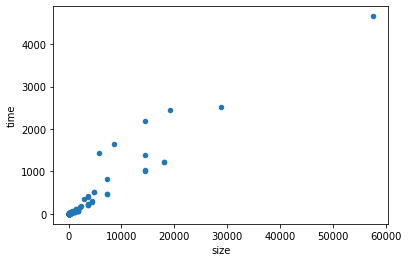

In [10]:

a.plot(x='size', y='time', kind = 'scatter')
plt.show()

<AxesSubplot:xlabel='size'>

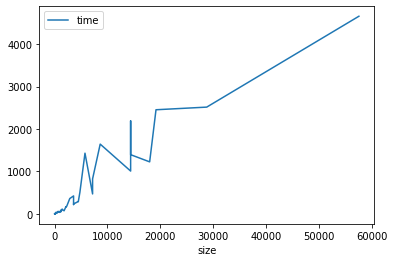

In [11]:
a.plot(x='size', y="time")

<AxesSubplot:xlabel='size', ylabel='time'>

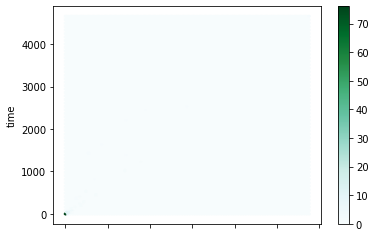

In [12]:
a.plot(x='size', y="time", kind='hexbin')

<AxesSubplot:xlabel='time', ylabel='size'>

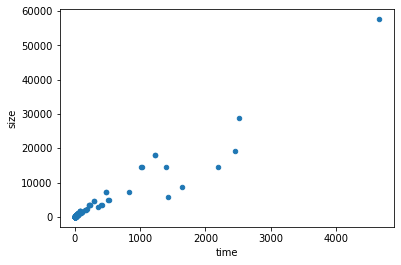

In [13]:
a.plot(x='time', y='size', kind = 'scatter')

<AxesSubplot:xlabel='time'>

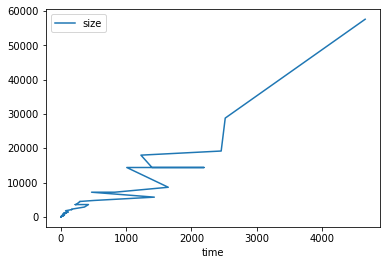

In [14]:
a.plot(x='time', y='size')


In [15]:
a

,function,value,time,element_size,vector_size,throughput_num,throughput,size
10,async,512-9600,4657.928098,512,9600,6.039798e+10,1.296670e+07,57600.00000
51,async,512-4800,2516.705361,512,4800,3.019899e+10,1.199941e+07,28800.00000
78,async,1024-800,2454.546269,1024,800,2.013266e+10,8.202192e+06,19200.00000
54,async,256-12000,1233.953513,256,12000,1.887437e+10,1.529585e+07,18000.00000
128,async,256-12000,1226.802792,256,12000,1.887437e+10,1.538501e+07,18000.00000
...,...,...,...,...,...,...,...,...
41,async,64-12,0.344876,64,12,1.179648e+06,3.420495e+06,1.12500
52,async,32-24,0.217049,32,24,5.898240e+05,2.717476e+06,0.56250
126,async,32-24,0.206134,32,24,5.898240e+05,2.861363e+06,0.56250
49,async,32-12,0.210689,32,12,2.949120e+05,1.399747e+06,0.28125


In [16]:
b.loc[b['time']  > 500 ]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
138,async,512-800,511.660419,512,800,5.033165e+09,9.836924e+06,4800.0
64,async,512-800,518.896088,512,800,5.033165e+09,9.699755e+06,4800.0
6,async,512-1200,825.438600,512,1200,7.549747e+09,9.146346e+06,7200.0
90,async,256-9600,1009.972129,256,9600,1.509949e+10,1.495041e+07,14400.0
22,async,256-9600,1025.727578,256,9600,1.509949e+10,1.472076e+07,14400.0
128,async,256-12000,1226.802792,256,12000,1.887437e+10,1.538501e+07,18000.0
54,async,256-12000,1233.953513,256,12000,1.887437e+10,1.529585e+07,18000.0
60,async,512-2400,1396.036408,512,2400,1.509949e+10,1.081597e+07,14400.0
92,async,1024-240,1431.346698,1024,240,6.039798e+09,4.219661e+06,5760.0
115,async,1024-360,1644.840375,1024,360,9.059697e+09,5.507949e+06,8640.0


In [17]:
b

,function,value,time,element_size,vector_size,throughput_num,throughput,size
11,async,32-48,0.137424,32,48,1.179648e+06,8.584021e+06,1.12500
79,async,32-48,0.139551,32,48,1.179648e+06,8.453172e+06,1.12500
124,async,32-12,0.200488,32,12,2.949120e+05,1.470971e+06,0.28125
126,async,32-24,0.206134,32,24,5.898240e+05,2.861363e+06,0.56250
49,async,32-12,0.210689,32,12,2.949120e+05,1.399747e+06,0.28125
...,...,...,...,...,...,...,...,...
115,async,1024-360,1644.840375,1024,360,9.059697e+09,5.507949e+06,8640.00000
96,async,1024-600,2192.520871,1024,600,1.509949e+10,6.886819e+06,14400.00000
78,async,1024-800,2454.546269,1024,800,2.013266e+10,8.202192e+06,19200.00000
51,async,512-4800,2516.705361,512,4800,3.019899e+10,1.199941e+07,28800.00000


<AxesSubplot:xlabel='time'>

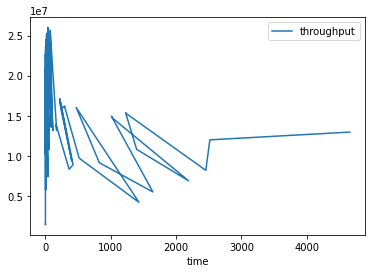

In [18]:
a.plot(x='time', y='throughput')


<AxesSubplot:xlabel='size'>

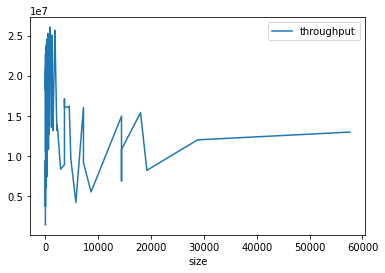

In [19]:
a.plot(x='size', y='throughput')


<AxesSubplot:xlabel='vector_size'>

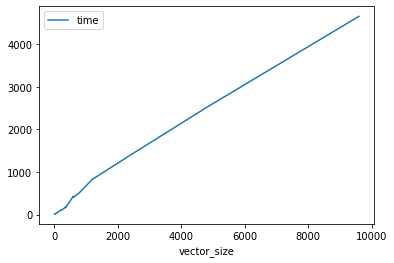

In [20]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

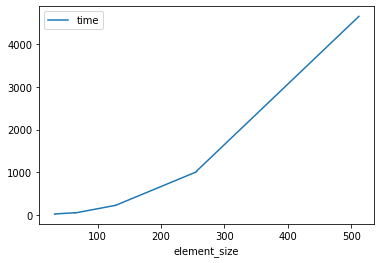

In [21]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='time')


<AxesSubplot:xlabel='vector_size'>

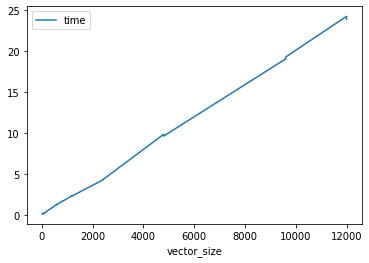

In [22]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

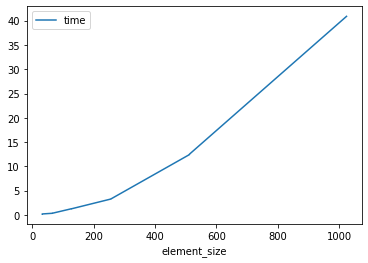

In [23]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='time')


In [24]:
a[a.value.str.contains(r".*-800$")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
78,async,1024-800,2454.546269,1024,800,2.013266e+10,8.202192e+06,19200.00
64,async,512-800,518.896088,512,800,5.033165e+09,9.699755e+06,4800.00
138,async,512-800,511.660419,512,800,5.033165e+09,9.836924e+06,4800.00
46,async,256-800,50.701040,256,800,1.258291e+09,2.481786e+07,1200.00
121,async,256-800,50.232870,256,800,1.258291e+09,2.504916e+07,1200.00
43,async,128-800,12.928714,128,800,3.145728e+08,2.433133e+07,300.00
117,async,128-800,12.807470,128,800,3.145728e+08,2.456167e+07,300.00
135,async,64-800,3.755451,64,800,7.864320e+07,2.094108e+07,75.00
62,async,64-800,3.796442,64,800,7.864320e+07,2.071497e+07,75.00
134,async,32-800,1.658066,32,800,1.966080e+07,1.185767e+07,18.75


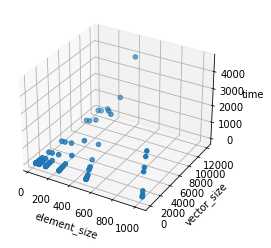

In [25]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(a['element_size'], a['vector_size'],a['time'])
threedee.set_xlabel('element_size')
threedee.set_ylabel('vector_size')
threedee.set_zlabel('time')
plt.show()

No handles with labels found to put in legend.


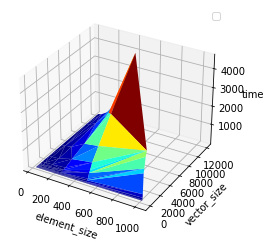

In [26]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()

ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.jet, linewidth=0.2)
plt.show()

No handles with labels found to put in legend.


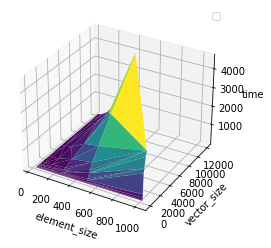

In [27]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()
plt.show()

No handles with labels found to put in legend.


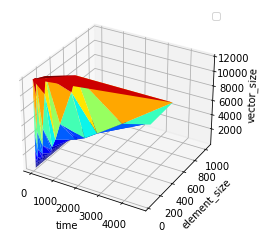

In [28]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['time'], a['element_size'],a['vector_size'], cmap=plt.cm.jet, linewidth=0.1)
ax.set_xlabel("time")
ax.set_ylabel("element_size")
ax.set_zlabel("vector_size")
ax.legend()
plt.show()

<AxesSubplot:xlabel='element_size'>

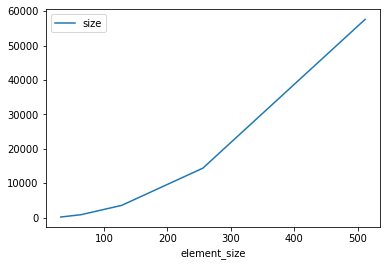

In [29]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='element_size'>

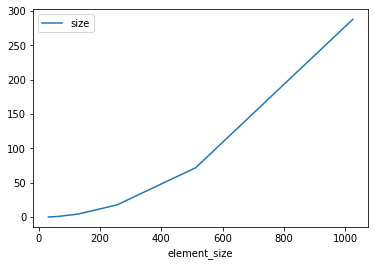

In [30]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='vector_size'>

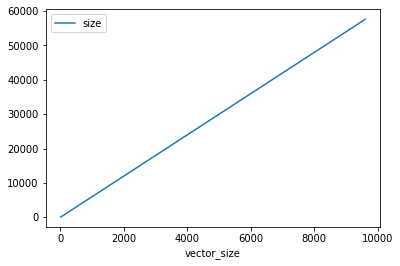

In [31]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='size')


<AxesSubplot:xlabel='vector_size'>

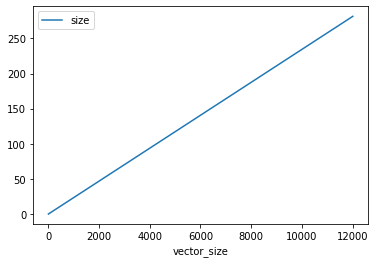

In [32]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='size')


In [33]:
b[b.value.str.contains(r"^512-4800")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
51,async,512-4800,2516.705361,512,4800,3.019899e+10,1.199941e+07,28800.0
